In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_regression
%matplotlib inline

In [2]:
df=load_breast_cancer()
X=df.data
y=df.target
X=pd.DataFrame(X,columns=df.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
scaler=StandardScaler()
min_max=MinMaxScaler()

##### SCALING IS NOT REQUIRED IN CASE OF TREES AND BOOSTING ALGORITHMS USING TREES AS THEIR BASE MODEL

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [5]:
tree_model=DecisionTreeClassifier(max_depth=7,splitter='best',min_samples_split=2)
tree_model.fit(X_train,y_train)
y_pred=tree_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9122807017543859

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [6]:
model=LogisticRegression(penalty='l1',solver='liblinear',C=1.0,max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [7]:
grad_boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)
grad_boost.fit(X_train,y_train)
y_pred=grad_boost.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



##### GRADIENT BOOSTING USES TREES ENSEMBLE BY DEFAULT AND WE CAN NOT USE LOGISTIC REGRESSION AS ITS BASE MODEL

In [8]:
ada_boost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100,learning_rate=0.1)
ada_boost.fit(X_train,y_train)
y_pred=ada_boost.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



##### GRADIENT BOOST AS A REGRESSOR

In [9]:
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1255.2864413063485
Mean Absolute Error: 28.27071978638817
R² Score: 0.9251163064345184


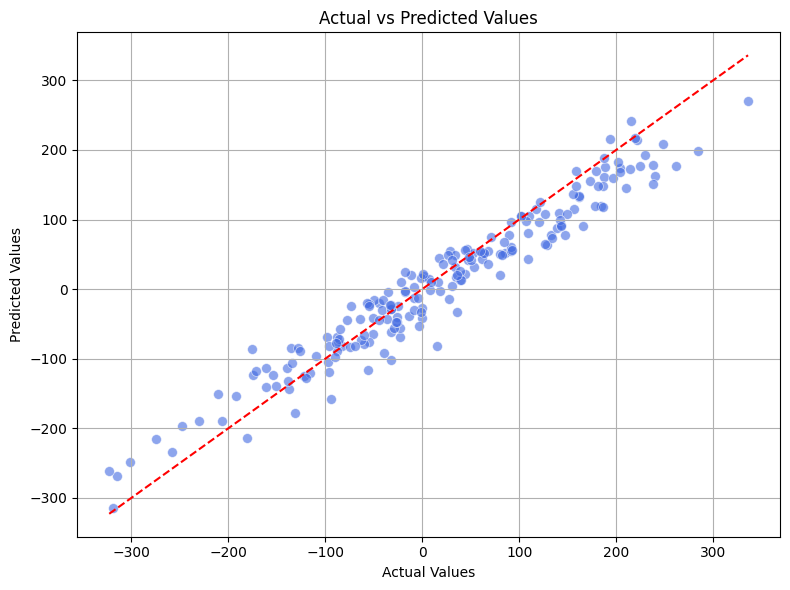

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', s=50,alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

This is not the best fit line as we used gradient boosting and not linear regression